#Objective: Train an ANN to identify if a company might go bankrupt

##Import Libraries

In [82]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from IPython import display
display.set_matplotlib_formats('svg') # Improve matplotlib visual quality

<ipython-input-82-455bad2cf7b9>:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg') # Improve matplotlib visual quality


##Import Dataset

In [83]:
!wget https://raw.githubusercontent.com/JudeIbeekeocha/Database_Repo/main/data%202.csv

--2024-08-08 13:52:23--  https://raw.githubusercontent.com/JudeIbeekeocha/Database_Repo/main/data%202.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11456101 (11M) [text/plain]
Saving to: ‘data 2.csv.2’

data 2.csv.2        100%[===================>]  10.92M  --.-KB/s    in 0.05s   

2024-08-08 13:52:23 (207 MB/s) - ‘data 2.csv.2’ saved [11456101/11456101]



In [84]:
data = pd.read_csv('data 2.csv').iloc[:, :11] # Using the first 11 values

In [85]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax)
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550
...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,0.781588
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,0.781586
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,0.781546
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,0.781663


In [86]:
print('The amount of bankrupt companies:', (data['Bankrupt?'] == 1).sum())
print('The amount of non-bankrupt companies:', (data['Bankrupt?'] == 0).sum())

The amount of bankrupt companies: 220
The amount of non-bankrupt companies: 6599


<Axes: xlabel='Bankrupt?'>

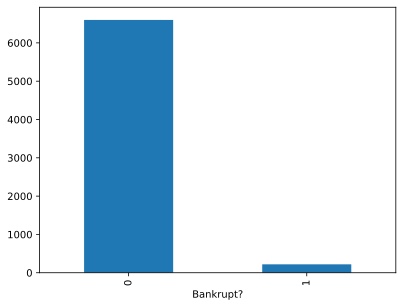

In [87]:
data['Bankrupt?'].value_counts().plot(kind= 'bar')

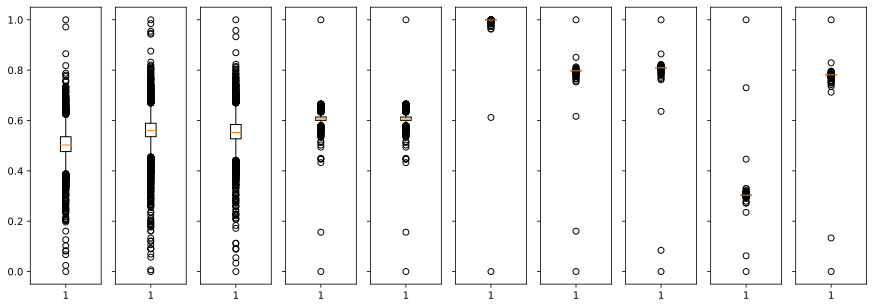

In [88]:
fig, ax = plt.subplots(1, len(data.columns) - 1, sharey=True, figsize = (15, 5))

for i, col in enumerate([i for i in data.columns if i != 'Bankrupt?']):
  ax[i].boxplot(data[col])

##Data Preprocessing

In [89]:
df_majority = data[data['Bankrupt?'] == 0]
df_minority = data[data['Bankrupt?'] == 1]

In [90]:
# Downsize the Majority class

df_downsize = resample( # resample shuffles the data by default which is good
                      df_majority,
                      replace=False,
                      n_samples=len(df_minority), #downsizing to the length of the minority
                      random_state= 0
)

In [91]:
# Combining the downsized and minority
df_balanced = pd.concat([df_downsize, df_minority])
df_balanced

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax)
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,0.786079
613,0,0.527568,0.603958,0.570587,0.617204,0.617204,0.999137,0.797677,0.809534,0.303675,0.781729
3301,0,0.560328,0.633450,0.622517,0.594683,0.594683,0.998961,0.797430,0.809354,0.303611,0.781615
6479,0,0.522157,0.593000,0.581134,0.640568,0.640568,0.999152,0.797580,0.809498,0.303473,0.781764
6216,0,0.530298,0.563127,0.576905,0.623805,0.623805,0.999136,0.797539,0.809453,0.303436,0.781724
...,...,...,...,...,...,...,...,...,...,...,...
6591,1,0.418515,0.433984,0.461427,0.612750,0.612750,0.998864,0.796902,0.808857,0.302892,0.781254
6640,1,0.196802,0.211023,0.221425,0.598056,0.598056,0.998933,0.796144,0.808149,0.301423,0.780388
6641,1,0.337640,0.254307,0.378446,0.590842,0.590842,0.998869,0.796943,0.808897,0.302953,0.781340
6642,1,0.340028,0.344636,0.380213,0.581466,0.581466,0.998372,0.796292,0.808283,0.302857,0.780733


##Splitting the Dataset

In [92]:
x = df_balanced.drop('Bankrupt?', axis=1).values
y = df_balanced['Bankrupt?'].values


In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)


##Scaling the Data

In [107]:
scaled = StandardScaler()
x_s_train = scaled.fit_transform(x_train)
x_s_test = scaled.transform(x_test)

##EDA

<Axes: xlabel='Bankrupt?'>

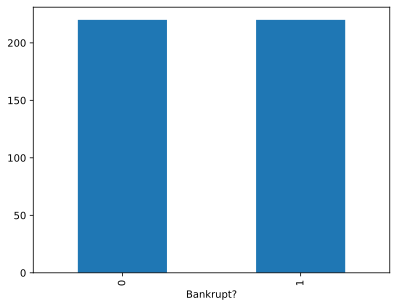

In [108]:
df_balanced['Bankrupt?'].value_counts().plot(kind= 'bar')

##Building the ANN

In [123]:
input_layer = len([i for i in data.columns if i != 'Bankrupt?'])
hidden_layer = 75
output_layer = 1

In [124]:
ann = tf.keras.models.Sequential()

# Input layer
ann.add(tf.keras.layers.Dense(units = input_layer, activation='relu'))
# Hidden layer
ann.add(tf.keras.layers.Dense(units = hidden_layer, activation='relu'))
# Hidden layer
ann.add(tf.keras.layers.Dense(units = hidden_layer, activation='relu'))
# Output layer
ann.add(tf.keras.layers.Dense(units = output_layer, activation='sigmoid'))

###Training the ANN

In [125]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [126]:
ann.fit(x_s_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.6188 - loss: 0.6666
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7598 - loss: 0.5923  
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7668 - loss: 0.5442  
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7560 - loss: 0.5253 
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7328 - loss: 0.5637  
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7605 - loss: 0.5165 
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7716 - loss: 0.4750  
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7943 - loss: 0.4647 
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.8099 - loss: 0.4564 
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.7974 - loss: 0.4494  
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7741 - loss: 0.5105 
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7635 - loss: 0.4861 
Epoch 13/100
11/11 ━━

##Predicting the Test result

In [127]:
pred = ann.predict(x_s_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [128]:
pred = (pred >0.5).astype(int)
df = pd.DataFrame({'True': y_test.flatten(), "predictions":pred.flatten(), 'Result':y_test.flatten() + pred.flatten()})

In [129]:
df

,True,predictions,Result
0,0,0,0
1,1,1,2
2,1,1,2
3,1,1,2
4,0,0,0
...,...,...,...
83,0,0,0
84,0,0,0
85,0,1,1
86,0,1,1


##Accuracy & Confusion Matrix

In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [131]:
print(f'The ANN is:{accuracy_score(y_test, pred) * 100: .3f}% accurate')

The ANN is: 85.227% accurate


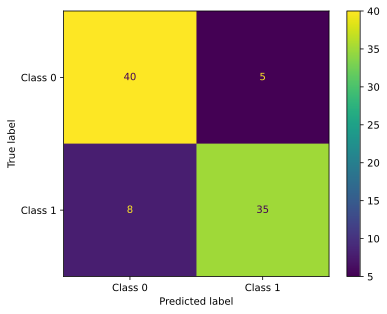

In [132]:
cm =confusion_matrix(y_test, pred)
_ = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=['Class 0', 'Class 1'])
_.plot()